<a href="https://colab.research.google.com/github/diegochaux/SOLUCIONPARCIAL/blob/main/SOLUCION_PARCIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#función cero y pendiente
def my_ceropend(x,xhmax=5,xhmin=-5):
  #cálculo de pendiente y cero
  m = (xhmax-xhmin)/(x.max()-x.min())
  b = xhmin - m*x.min()
  xh = m*x+b
  return xh

EN EL PRIMER CODIGO SE CREA LA FUNCIÓN DE CERO Y PENDIENTE CON xhmax= 5 y xhmin=-5

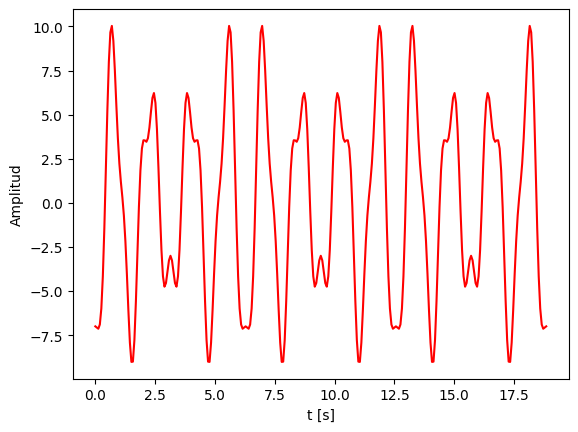

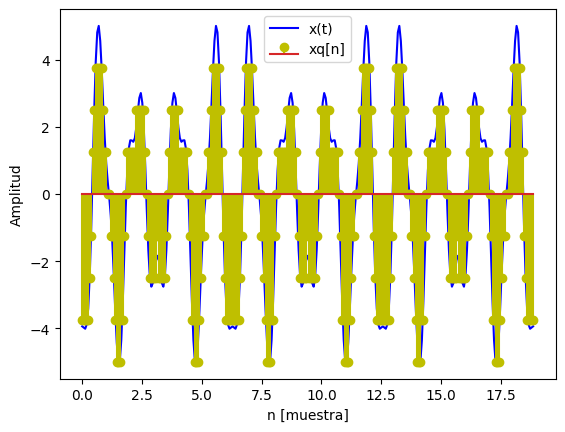

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

T1 = (1/2)*np.pi # PERIODO PRIMERA SEÑAL
T2 = (2/5)*np.pi # PERIODO SEGUNDA SEÑAL
T3 = (1/5)*np.pi # PERIODO TERCERA SEÑAL
F1 = 1/T1
F2 = 1/T2
F3 = 1/T3
T = 2*np.pi # PERIODO SEÑAL GENERAL
Fs = 10*max(F1,F2,F3) #FRECUENCIA MUESTREO
t = np.arange(0,3*T,1/Fs) #vector de tiempo, se muestran 3 periodos
x = 7*(np.sin(4*t-(1/2)*np.pi))-2*(np.cos(5*t))+2*(np.cos(10*t)) #LA FUNCION DADA
xhmax = 5  #VALOR MAXIMO
xhmin = -5 #VALOR MINIMO
xh = my_ceropend(x,xhmax, xhmin).reshape(-1,1)#SE APLICA CERO Y PENDIENTE DE -5 A 5


#cuantizar
nbits = 3 # INDICA NUMERO DE BITS
Ne = 2**nbits # INDICA CANTIDAD DE ESTADOS
res = (xhmax-xhmin)/Ne #RESOLUCION CUANTIZACIÓN
ve = np.arange(xhmin,xhmax,res).reshape(-1,1)#vector de estados


xq = np.zeros(len(xh)) #INDICA LA SEÑAL CUANTIZADA
for i in range(len(xh)): #RECORRE SEÑAL CERO Y PENDIENTE
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #LA FUNCION ES CALCULAR LA DISTANCIA DE CADA PUNTO AL VECTOR DE ESTADOS

#SE GRAFICAN LAS SEÑALES
plt.plot(t,x,'r',label='x(t)')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()
plt.plot(t,xh,'b',label='x(t)')
plt.stem(t,xq,'y',label='xq[n]')
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()